In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df_ = pd.read_csv("insurance.csv")
df = df_.copy()

In [3]:

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df["sex"].replace({"female":0, "male":1}, inplace=True)
df["smoker"].replace({"yes":1, "no":0}, inplace=True)

In [5]:
df_new = pd.get_dummies(df, columns=["region"], drop_first=True, dtype=int)
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [ ]:
################ KNN #################

In [13]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [15]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [16]:
knn_model.n_neighbors

5

In [17]:
knn_model.effective_metric_

'euclidean'

In [ ]:
# Tahmin #

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

10798.008703429128

In [20]:
r2_score(y_test, y_pred)

0.22727741212889763

In [21]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  604.3975034047105
k = 2 için RMSE değeri:  6618.273825035296
k = 3 için RMSE değeri:  8124.303614142548
k = 4 için RMSE değeri:  8799.497699938014
k = 5 için RMSE değeri:  9259.158113466536
k = 6 için RMSE değeri:  9560.337778939062
k = 7 için RMSE değeri:  9756.51546069752
k = 8 için RMSE değeri:  9914.256667880532
k = 9 için RMSE değeri:  10072.543088980812
k = 10 için RMSE değeri:  10198.606514831627


In [ ]:
# Model Tunning #

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [24]:
knn = KNeighborsRegressor()

In [25]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [26]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [27]:
knn_cv_model.best_params_["n_neighbors"]

22

In [28]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [30]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=22)

In [31]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

11257.04209648746

In [32]:
r2_score(y_test, knn_tuned.predict(X_test))

0.16018265214112282

In [35]:
from sklearn.preprocessing import robust_scale

In [36]:
df_scaled = pd.DataFrame(robust_scale(df_new), columns=df_new.columns)

In [37]:
df_neww = df_scaled.copy()

In [38]:
df_neww.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-0.833333,-1.0,-0.297708,-0.5,1.0,0.630515,0.0,0.0,1.0
1,-0.875000,0.0,0.401310,0.0,0.0,-0.643422,0.0,1.0,0.0
2,-0.458333,0.0,0.309616,1.0,0.0,-0.414515,0.0,1.0,0.0
3,-0.250000,0.0,-0.916344,-0.5,0.0,1.059062,1.0,0.0,0.0
4,-0.291667,0.0,-0.181006,-0.5,0.0,-0.463475,1.0,0.0,0.0


In [39]:
X = df_neww.drop("charges", axis=1)
y = df_neww["charges"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [43]:
knn = KNeighborsRegressor()

In [44]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [45]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [46]:
knn_cv_model.best_params_["n_neighbors"]

6

In [47]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [48]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [49]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.4990467375656136

In [50]:
r2_score(y_test, knn_tuned.predict(X_test))

0.7662857030159514

In [ ]:
####### SVR(Destek Vektor Regresyonu)#######

In [68]:
X = df_neww.drop("charges", axis=1)
y = df_neww["charges"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [70]:
from sklearn.svm import SVR

In [71]:
svr_model = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)

In [72]:
svr_model.predict(X_train)[0:5]

array([-0.61459534, -0.42754424,  0.12515727,  2.52363752, -0.01847997])

In [73]:
y_pred = svr_model.predict(X_train)

In [74]:
#plt.scatter(X_train, y_train)
#plt.plot(X_train,y_pred, color = "r")


In [75]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -0.04983058132736362 + 0.523627173372796 x


In [ ]:
# Tahmin #

In [76]:
print ("y = {0} + {1} x".format(svr_model.intercept_, svr_model.coef_)) 

y = [-0.15737051] + [[ 0.52714392 -0.0256869   0.07389106  0.07105717  2.51086689 -0.03288086
  -0.0555528  -0.06287649]] x


In [78]:
y_pred = svr_model.predict(X_test)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.540796936622343

In [80]:
r2_score(y_test, y_pred)

0.7255449132815854

In [ ]:
# MLP(Multi Layer Perceptron) #

In [6]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [7]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [90]:
mlp_model.n_layers_

4

In [91]:
mlp_model.hidden_layer_sizes

(100, 20)

In [ ]:
# Tahmin #

In [15]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [16]:
mlp_params = {'alpha': [0.1, 0.01,0.02],
             'hidden_layer_sizes': [(20,20),(100,50,150)],
             'activation': ['relu','logistic']}

In [17]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [18]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150)]})

In [19]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [21]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [23]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [24]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

5375.328196615897

In [26]:
r2_score(y_test, y_pred)

0.8085099411542198

In [ ]:
##### CART ########

In [27]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [32]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [33]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
from skompiler import skompile

In [36]:
#print(skompile(cart_model.predict).to('python/code'))

In [37]:
y_pred =cart_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

6457.995300281467

In [39]:
r2_score(y_test, y_pred)

0.723604027512055

In [ ]:
# Model Tunning #

In [40]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

6565.290641926008

In [42]:
r2_score(y_test, y_pred)

0.7143434578242681

In [43]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [44]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [45]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [46]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 68}

In [47]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 68)

In [48]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=68)

In [49]:
y_pred = cart_tuned.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

4998.198771712407

In [51]:
r2_score(y_test, y_pred)

0.834436992056256

In [ ]:
##### Bagged Trees Regresyon #####

In [52]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [54]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [55]:
bag_model.n_estimators

10

In [ ]:
# Tahmin #

In [56]:
y_pred = bag_model.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

5092.990198835926

In [58]:
r2_score(y_test, y_pred)

0.8280975992611306

In [ ]:
# Model Tunning #

In [59]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [60]:
bag_params = {"n_estimators": range(2,20)}

In [61]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [62]:
bag_cv_model2 = RandomizedSearchCV(bag_model, bag_params, cv = 10)

In [64]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [65]:
bag_cv_model.best_params_

{'n_estimators': 12}

In [66]:
bag_tuned = BaggingRegressor( n_estimators = 12)

In [67]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=12)

In [68]:
y_pred = bag_tuned.predict(X_test)

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

4944.2526776290815

In [70]:
r2_score(y_test, y_pred)

0.8379915839451848

In [ ]:
######## Random Forest #############

In [73]:
X = df_new.drop("charges", axis=1)
y = df_new["charges"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf_model = RandomForestRegressor(random_state = 42)

In [77]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Tahmin #

In [78]:
y_pred = rf_model.predict(X_test)

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

4807.811548956565

In [80]:
r2_score(y_test, y_pred)

0.8468097468443943

In [ ]:
# Model Tunning #

In [85]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10],
            'n_estimators' : [100, 200, 500, 1000]}

In [86]:
rf_model = RandomForestRegressor(random_state = 42)

In [87]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [88]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]})

In [89]:
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 10, 'n_estimators': 200}

In [91]:
rf_tuned = RandomForestRegressor(max_depth  = 4, 
                                 max_features = 10, 
                                 n_estimators =200)

In [92]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=10, n_estimators=200)

In [93]:
y_pred = rf_tuned.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

4671.2146376979945

In [95]:
r2_score(y_test, y_pred)

0.8553908053569833

In [96]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

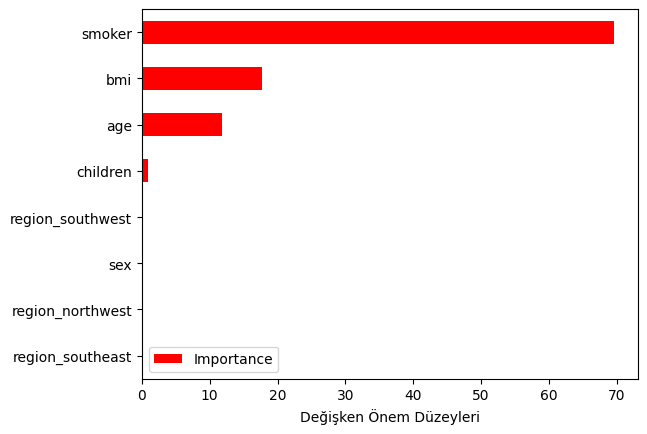

In [97]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
###### Gradient Bootsing Machines ######

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Tahmin #

In [100]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4584.482669912574

In [101]:
r2_score(y_test, y_pred)

0.8607109642628479

In [ ]:
# Model Tunning #

In [102]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [103]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [104]:
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [105]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.75}

In [106]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 3, 
                                      n_estimators = 500, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [107]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4505.546051504275

In [108]:
r2_score(y_test, y_pred)

0.8654662874044706

In [109]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

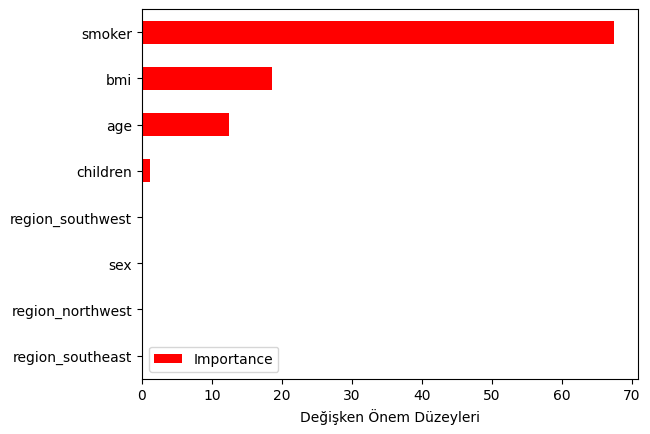

In [110]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
################# XGBOOST #######################

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [113]:
import xgboost as xgb

In [114]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [115]:
from xgboost import XGBRegressor

In [116]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [ ]:
# Tahmin #

In [117]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5158.750571099376

In [118]:
r2_score(y_test, y_pred)

0.8236297538283285

In [ ]:
# Model Tunning #

In [119]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [120]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


In [130]:
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [131]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [132]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.01, 
                         max_depth = 3, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [133]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4458.331270440871

In [134]:
r2_score(y_test, y_pred)

0.8682711406653282

In [ ]:
####### Light GBM #########

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [136]:
from lightgbm import LGBMRegressor

In [137]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13267.935814


In [ ]:
# Tahmin #

In [138]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [139]:
np.sqrt(mean_squared_error(y_test, y_pred))

4690.961303296117

In [140]:
r2_score(y_test, y_pred)

0.8541656057996099

In [ ]:
# Model Tunning #

In [141]:
lgbm_model

LGBMRegressor()

In [142]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [143]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13267.935814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [144]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 40}

In [145]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 3, 
                           n_estimators = 40,
                          colsample_bytree = 1)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13267.935814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [146]:
y_pred = lgbm_tuned.predict(X_test)

In [147]:
np.sqrt(mean_squared_error(y_test, y_pred))

4455.735014057657

In [148]:
r2_score(y_test, y_pred)

0.8684245174741775

In [ ]:
############### CatBoost #################

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [150]:
from catboost import CatBoostRegressor

In [151]:
catb = CatBoostRegressor()

In [152]:
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.040962
0:	learn: 11656.8569316	total: 123ms	remaining: 2m 3s
1:	learn: 11314.4858148	total: 126ms	remaining: 1m 2s
2:	learn: 11001.3495524	total: 128ms	remaining: 42.4s
3:	learn: 10662.6611302	total: 130ms	remaining: 32.3s
4:	learn: 10346.6447943	total: 132ms	remaining: 26.3s
5:	learn: 10056.5433548	total: 134ms	remaining: 22.2s
6:	learn: 9762.8964822	total: 136ms	remaining: 19.2s
7:	learn: 9497.6152667	total: 136ms	remaining: 16.9s
8:	learn: 9240.2960203	total: 142ms	remaining: 15.7s
9:	learn: 8998.9601285	total: 145ms	remaining: 14.3s
10:	learn: 8766.5754933	total: 146ms	remaining: 13.2s
11:	learn: 8527.9750640	total: 147ms	remaining: 12.1s
12:	learn: 8300.6963715	total: 148ms	remaining: 11.3s
13:	learn: 8085.4720541	total: 150ms	remaining: 10.6s
14:	learn: 7899.0128712	total: 152ms	remaining: 9.98s
15:	learn: 7743.3768037	total: 156ms	remaining: 9.6s
16:	learn: 7571.2401208	total: 158ms	remaining: 9.15s
17:	learn: 7398.7149821	total: 160ms	remaining: 8.75s
18:

In [ ]:
# Tahmin #

In [153]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4631.213861181185

In [154]:
r2_score(y_test, y_pred)

0.8578568505083144

In [ ]:
# Model Tunning #

In [155]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [156]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [157]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 11951.1861429	total: 1.12ms	remaining: 1.12s
1:	learn: 11859.8524649	total: 2.13ms	remaining: 1.06s
2:	learn: 11766.7154339	total: 2.97ms	remaining: 988ms
3:	learn: 11696.5317102	total: 3.6ms	remaining: 895ms
4:	learn: 11605.7066909	total: 4.38ms	remaining: 871ms
5:	learn: 11525.6979119	total: 5.16ms	remaining: 854ms
6:	learn: 11439.1113302	total: 5.95ms	remaining: 844ms
7:	learn: 11365.1535876	total: 6.74ms	remaining: 836ms
8:	learn: 11278.3131937	total: 7.79ms	remaining: 858ms
9:	learn: 11193.0528061	total: 8.79ms	remaining: 870ms
10:	learn: 11115.5636496	total: 9.73ms	remaining: 875ms
11:	learn: 11033.4958691	total: 10.7ms	remaining: 878ms
12:	learn: 10957.8260802	total: 11.7ms	remaining: 886ms
13:	learn: 10887.1815046	total: 12.6ms	remaining: 889ms
14:	learn: 10813.2435040	total: 13.5ms	remaining: 889ms
15:	learn: 10734.8303682	total: 14.5ms	remaining: 889ms
16:	learn: 10662.0544205	total: 15.4ms	remaining: 889

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000024926F2C2C0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [158]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 1000, 'learning_rate': 0.01}

In [159]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.01, 
                               depth = 3)

In [160]:
catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 11951.1861429	total: 1.87ms	remaining: 1.87s
1:	learn: 11859.8524649	total: 2.94ms	remaining: 1.47s
2:	learn: 11766.7154339	total: 3.7ms	remaining: 1.23s
3:	learn: 11696.5317102	total: 4.4ms	remaining: 1.09s
4:	learn: 11605.7066909	total: 5.75ms	remaining: 1.14s
5:	learn: 11525.6979119	total: 6.48ms	remaining: 1.07s
6:	learn: 11439.1113302	total: 7.34ms	remaining: 1.04s
7:	learn: 11365.1535876	total: 8.2ms	remaining: 1.02s
8:	learn: 11278.3131937	total: 9.1ms	remaining: 1s
9:	learn: 11193.0528061	total: 10ms	remaining: 995ms
10:	learn: 11115.5636496	total: 10.9ms	remaining: 978ms
11:	learn: 11033.4958691	total: 11.7ms	remaining: 961ms
12:	learn: 10957.8260802	total: 12.5ms	remaining: 949ms
13:	learn: 10887.1815046	total: 13.3ms	remaining: 937ms
14:	learn: 10813.2435040	total: 14.1ms	remaining: 927ms
15:	learn: 10734.8303682	total: 14.9ms	remaining: 918ms
16:	learn: 10662.0544205	total: 15.8ms	remaining: 914ms
17:	learn: 10582.2704454	total: 16.5ms	remaining: 901ms
18:	learn: 

In [161]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4413.68506811343

In [162]:
r2_score(y_test, y_pred)

0.8708962241346359

In [ ]:
########## SCORES ###################

In [163]:
veriler = {"Model": ["KNN", "SVR", "MLP", "CART", "Bagged", "RF", "GBM", "XGBoost", "LightGBM", "CatBoost"],
          "RMSE" : [0.4990, 0.5407, 5375.3281, 4998.1987, 4944.2526, 4671.2146, 4505.5460, 4458.3312, 4455.7350, 4413.6850],
          "R2":[0.7662, 0.7255, 0.8085, 0.8344, 0.8379, 0.8553, 0.8654, 0.8682, 0.8684, 0.8708]}
           

In [165]:
df_scores = pd.DataFrame(veriler)
df_scores.head(10)

,Model,RMSE,R2
0,KNN,0.4990,0.7662
1,SVR,0.5407,0.7255
2,MLP,5375.3281,0.8085
3,CART,4998.1987,0.8344
4,Bagged,4944.2526,0.8379
5,RF,4671.2146,0.8553
6,GBM,4505.5460,0.8654
7,XGBoost,4458.3312,0.8682
8,LightGBM,4455.7350,0.8684
9,CatBoost,4413.6850,0.8708


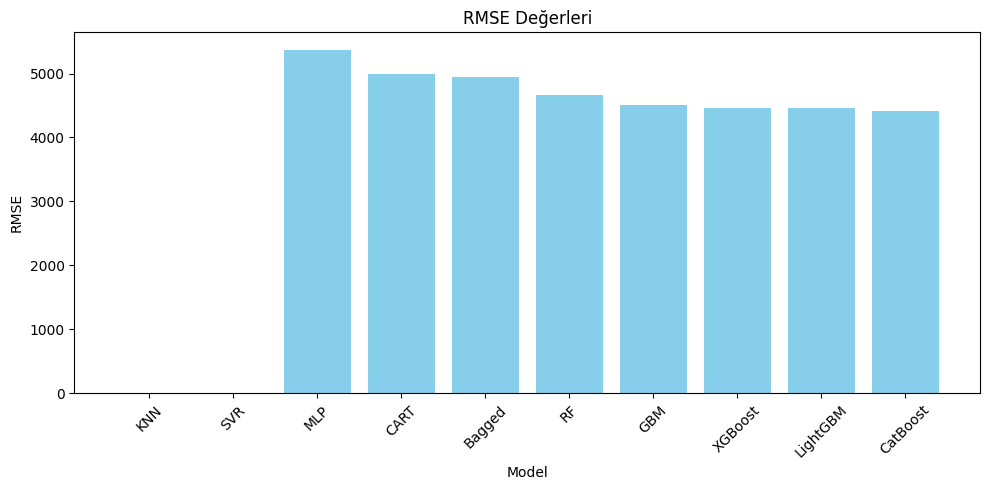

In [166]:
plt.figure(figsize=(10, 5))
plt.bar(df_scores["Model"], df_scores["RMSE"], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Değerleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

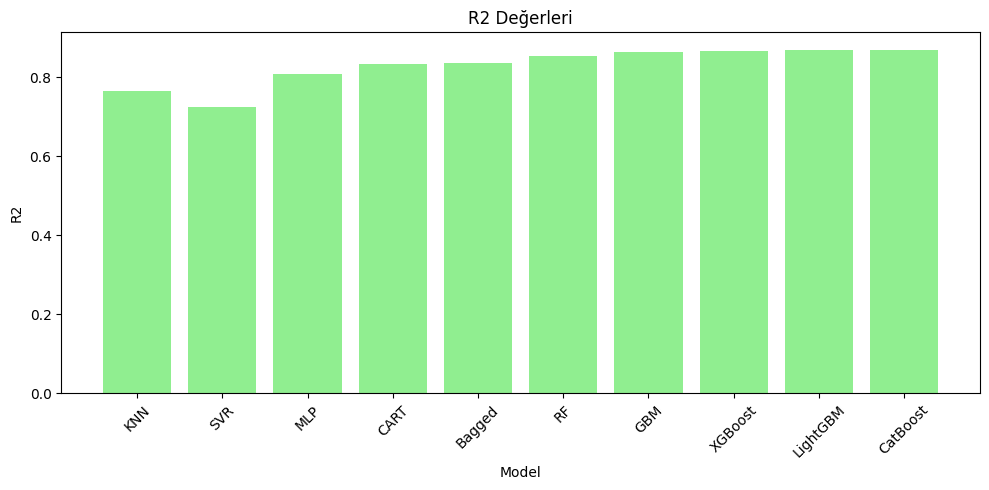

In [167]:
plt.figure(figsize=(10, 5))
plt.bar(df_scores["Model"], df_scores["R2"], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Değerleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
